# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [37]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [38]:
### Replace each question mark with the appropriate value.
import numpy as np
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape[0:2]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_test))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

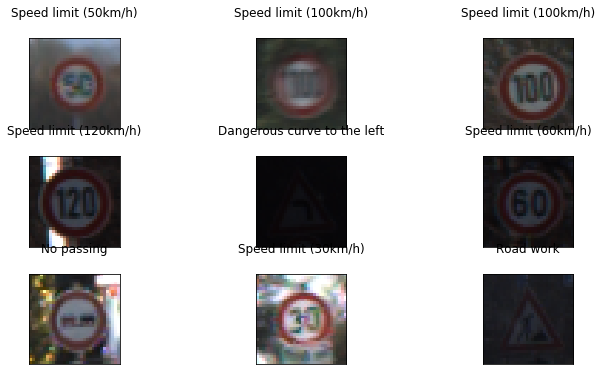

0 | 210 | Speed limit (20km/h)

1 | 2220 | Speed limit (30km/h)

2 | 2250 | Speed limit (50km/h)

3 | 1410 | Speed limit (60km/h)

4 | 1980 | Speed limit (70km/h)

5 | 1860 | Speed limit (80km/h)

6 | 420 | End of speed limit (80km/h)

7 | 1440 | Speed limit (100km/h)

8 | 1410 | Speed limit (120km/h)

9 | 1470 | No passing

10 | 2010 | No passing for vehicles over 3.5 metric tons

11 | 1320 | Right-of-way at the next intersection

12 | 2100 | Priority road

13 | 2160 | Yield

14 | 780 | Stop

15 | 630 | No vehicles

16 | 420 | Vehicles over 3.5 metric tons prohibited

17 | 1110 | No entry

18 | 1200 | General caution

19 | 210 | Dangerous curve to the left

20 | 360 | Dangerous curve to the right

21 | 330 | Double curve

22 | 390 | Bumpy road

23 | 510 | Slippery road

24 | 270 | Road narrows on the right

25 | 1500 | Road work

26 | 600 | Traffic signals

27 | 240 | Pedestrians

28 | 540 | Children crossing

29 | 270 | Bicycles crossing

30 | 450 | Beware of ice/snow

31 | 780 | Wil

In [39]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

# get a dictionary of label mappings
label_mapping = {}
f = open('signnames.csv')
data = f.readline()
for i in range(0,43):
    data = f.readline().split(',')
    label_mapping[data[0]] = data[1]

# show 9 random images 
def show_images(X, Y):
    grid = np.random.rand(4, 4)
    if len(X) < 9:
        fig, axes = plt.subplots(1, 5, figsize=(12, 6),
                                 subplot_kw={'xticks': [], 'yticks': []})
        fig.subplots_adjust(hspace=0.3, wspace=0.05)
        examples = []
        for i in range(0,5):
            examples.append(i)
        for ax, i in zip(axes.flat, examples):
            ax.imshow(X[i], cmap='viridis')
            ax.set_title(label_mapping[str(Y[i])])
        plt.show()
    else:
        fig, axes = plt.subplots(3, 3, figsize=(12, 6),
                                 subplot_kw={'xticks': [], 'yticks': []})
        fig.subplots_adjust(hspace=0.3, wspace=0.05)
        examples = []
        for i in range(0,9):
            examples.append(i)
        for ax, i in zip(axes.flat, examples):
            numb = random.randint(1, len(X_train))
            ax.imshow(X[numb], cmap='viridis')
            ax.set_title(label_mapping[str(Y[numb])])
        plt.show()

show_images(X_train,y_train)

signs = {}
for i in y_train:
    if i in signs:
        signs[i] = signs[i] + 1
    else:
        signs[i] = 1
for key in signs:
    print(str(key) +  ' | ' + str(signs[key]) + ' | ' + label_mapping[str(key)])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

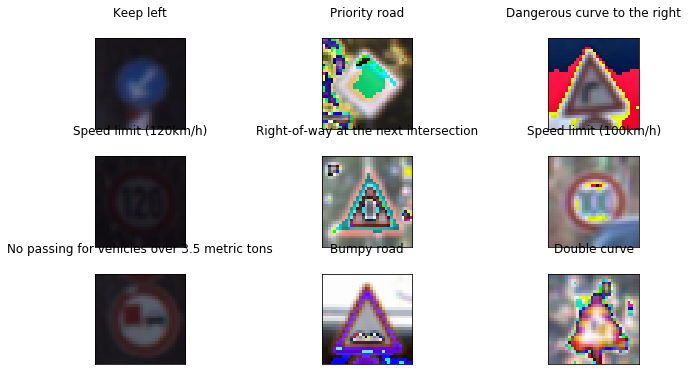

In [40]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import cv2
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

def preprocess(img):
    img = cv2.GaussianBlur(img,(3,3),0)
    img = (img - [128])/128
    return img


X_train = np.array([preprocess(image) for image in X_train ])
X_test =  np.array([preprocess(image) for image in X_test ])

show_images(X_train,y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

The preprocess step invloved shuffling, gaussian blurring and normakizing the data. Shuffling was done to make sure the examples are not in some particular order (i.e. all 20 km/h images bundles together). Normalization was done as suggested in the lectures to make sure all the values are in the same range. Gaussian blurring was done as suggested by the first project to smoothen the images.

**Answer:**

In [41]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split

X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.2)

print('Training Set: '+ str(len(X_train)))
print('Validation Set: '+ str(len(X_validation)))
print('Test Set: '+ str(len(X_test)))

Training Set: 39209
Validation Set: 2526
Test Set: 10104


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

The validation set was taken out of the test set by doing a 20/80 split. The training set remained the same since no additional data was generated.

**Answer:**

In [42]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    conv0_W = tf.Variable(tf.truncated_normal((3,3,3,32), mean = mu, stddev = sigma))
    conv0_b = tf.Variable(tf.zeros(32))
    conv0   = tf.nn.conv2d(x, conv0_W, strides=[1, 1, 1, 1], padding='SAME') + conv0_b
    
    # SOLUTION: Activation.
    conv0 = tf.nn.relu(conv0)
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal((3,3,32,32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(conv0, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal((3,3,32,64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='SAME') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    
    conv3_W = tf.Variable(tf.truncated_normal((3,3,64,64), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(64))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='SAME') + conv3_b
    
    # SOLUTION: Activation.
    conv3 = tf.nn.relu(conv3)

    conv4_W = tf.Variable(tf.truncated_normal((3,3,64,64), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(64))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='SAME') + conv4_b
    
    # SOLUTION: Activation.
    conv4 = tf.nn.relu(conv4)
    
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv4 = tf.nn.max_pool(conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv4)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(4096, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1_d = tf.nn.dropout(fc1, 0.8)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1_d, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2_d = tf.nn.dropout(fc2, 0.8)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2_d, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


The final architecture is just a modification of the LeNet example. I started out with the LeNet and added two additional conv layers. I also added dropout for the fully connected layers in the end. The architecture looks as follows:
Conv => Conv => Pool => Conv => Conv => Conv => Pool => FC => DropOut => FC => DropOut => FC

**Answer:**

In [43]:
### Train your model here.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [45]:
EPOCHS = 20
BATCH_SIZE = 128

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.722

EPOCH 2 ...
Validation Accuracy = 0.859

EPOCH 3 ...
Validation Accuracy = 0.913

EPOCH 4 ...
Validation Accuracy = 0.932

EPOCH 5 ...
Validation Accuracy = 0.930

EPOCH 6 ...
Validation Accuracy = 0.933

EPOCH 7 ...
Validation Accuracy = 0.944

EPOCH 8 ...
Validation Accuracy = 0.946

EPOCH 9 ...
Validation Accuracy = 0.939

EPOCH 10 ...
Validation Accuracy = 0.956

EPOCH 11 ...
Validation Accuracy = 0.940

EPOCH 12 ...
Validation Accuracy = 0.949

EPOCH 13 ...
Validation Accuracy = 0.946

EPOCH 14 ...
Validation Accuracy = 0.955

EPOCH 15 ...
Validation Accuracy = 0.952

EPOCH 16 ...
Validation Accuracy = 0.952

EPOCH 17 ...
Validation Accuracy = 0.957

EPOCH 18 ...
Validation Accuracy = 0.956

EPOCH 19 ...
Validation Accuracy = 0.962

EPOCH 20 ...
Validation Accuracy = 0.956

Model saved


In [46]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = " + str(test_accuracy))

Test Accuracy = 0.948931117239


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


Answer:
Training was done via Adam Optimizer with a batch size of 128. The number of Epochs were initially 10 but increased to 20. The mu and sigma was kept the same as the leNet lab. The learning rate was 0.001

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

Answer:
The solution was really an evolution of the LeNet lab example given in the lectures. First i took that example and with minimal changes ran the network and then i kept modifying it until i reached the final architecture described above. Adding additional conv layers helped.

The learning rate was dropped to 0.0005 but no improvement found. The epochs were increaded from 10 to 20 to improve the accuracy but betwen 10 and 20 it remains sort of the same. At first i took the validation set out of training and the accuracy was pretty high (0.976) but the test accuracy was around 0.92. Then i took the validation set out of test set and now the validation and test accurancy are pretty close. 

Dropout seems to helped a tiny bit. But if the keep probability is too low then the results start getting worse which makes sense because we start throwing too much information away in that case.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

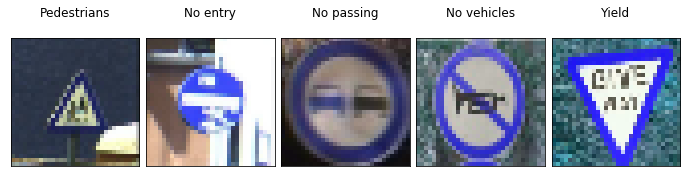

In [47]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import cv2
import matplotlib.pyplot as plt
samples = []
s_labels = np.array([27,17,9,15,13])
for i in range(1,6):
    image = cv2.imread('custom/'+str(i)+'.png')
    img = cv2.resize(image,(32,32), interpolation = cv2.INTER_CUBIC)
    samples.append(img)

show_images(samples,s_labels)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
The images are shown above. The labels are really what i thought appropriate for the images since most of the images are not present in the dataset we trained on. For instance the 'No vehicle' should really be 'No horn'. 'Give way' is another form of 'yield'. I have no idea what the third image is so i called it 'No passing'.
I will be surprised if it gets any of the above correct.

In [83]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

X_samples = np.array([preprocess(image) for image in samples ])
predicted = tf.argmax(logits, 1)
softmax_out = tf.nn.softmax(logits)
predictions = []
top_ks = []
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    res = sess.run([softmax_out, predicted], feed_dict = {x: X_samples})
    
    for (prediction, softmax_probs) in zip(res[1],res[0]):
        top_k = sess.run(tf.nn.top_k(softmax_probs, k=5))
            
        predictions.append(prediction)
        top_ks.append(top_k)

accuracy = (np.sum(predictions == s_labels))/5
print('accuracy:' + str(accuracy))

accuracy:0.2


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


Answer:
As expected, the performance is very bad on the 5 sample images. It did get the 'yield' one right which i think is because the shape of the sign is the same even though it probably did not recognize the 'give way' writing.

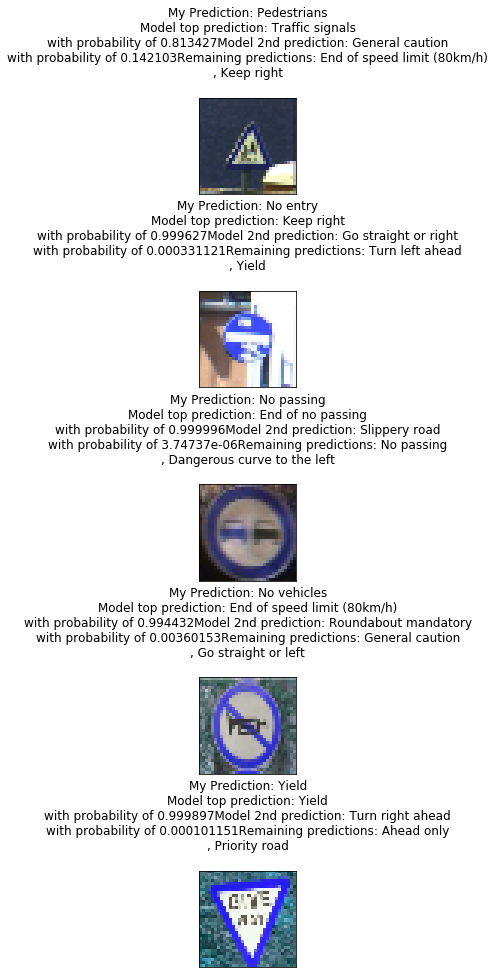

In [82]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
i=0
fig, axes = plt.subplots(5, 1, figsize=(16, 16),
                                 subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=1, wspace=0.0)
for (ax, prediction, top_k, image) in zip(axes.flat, predictions, top_ks, samples):
    ax.imshow(samples[i], cmap='viridis')
    title = 'My Prediction: '+label_mapping[str(s_labels[i])]
    title = title + 'Model top prediction: '+label_mapping[str(prediction)] +'with probability of '+str(top_k[0][0])
    title = title + 'Model 2nd prediction: '+label_mapping[str(top_k[1][1])] +'with probability of '+str(top_k[0][1])
    title = title + 'Remaining predictions: '+label_mapping[str(top_k[1][2])] +', '+label_mapping[str(top_k[1][3])]
    ax.set_title(title)
    i=i+1
plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
As you can see the model is extremely sure in each case of its prediction. The predictions for the first, second and thrid image are completely off the target. The forth one sort of makes sense since many images in the training set with a line across a circles is some 'end of speed limit' except in this case its a horn sign which is being seen as '80' by the model. The last one is correct which shows that the model is predicting based on the shape of the yeild sign.

Since the sample images were totally different from what the model was trained on, the wrong predictions were expected.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.